In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


colors = {
    0.05: "#577590", 
    0.1: "#4d908e",
    0.2: "#43aa8b",
    0.5: "#90be6d",
    1.0: "#f9c74f",
    2.0: "#f8961e",
    5.0: "#f3722c", 
    0: "black"
}


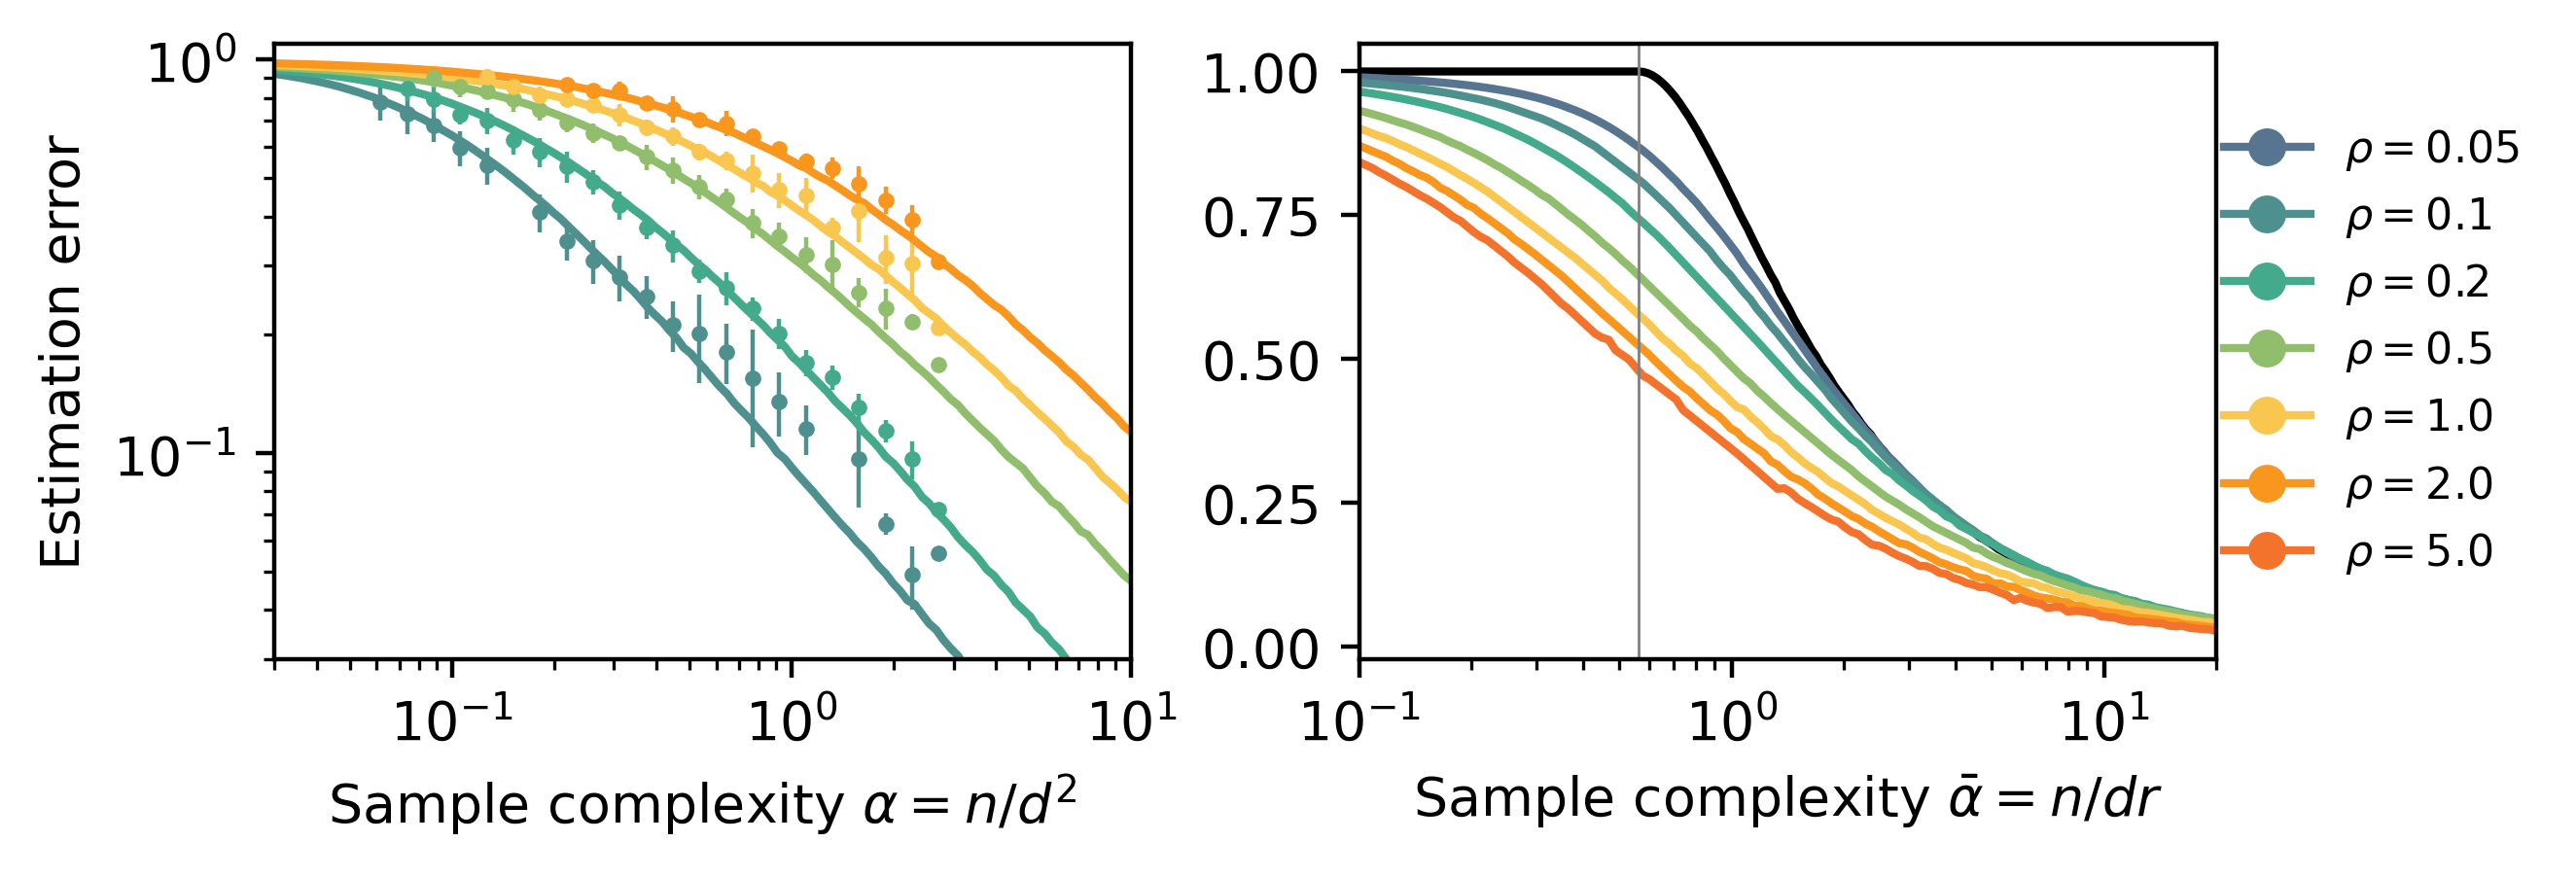

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(6.8, 2.35), dpi=400)

plt.subplot(121)

rho_list = [0.1, 0.2, 0.5, 1.0, 2.0]

for rho in rho_list:
    df = pd.read_csv(f"data/SE_hardmax/SE_hardmax_rho={rho}.csv")
    plt.plot(df['alpha'], df['mmse'], color=colors[rho])

    df = pd.read_csv(f"data/AMP_hardmax/AMP_hardmax_rho={rho}.csv")
    plt.errorbar(df['alpha'], df['mmse'], yerr=df['mmse_std'], fmt='o', color=colors[rho], ms=2, linewidth=0.8)


plt.xscale('log')
plt.yscale('log')
plt.xlim(0.03, 10)
plt.ylim(0.03, 1.1)
plt.yscale('log')
plt.ylabel('Estimation error')
plt.xlabel(r'Sample complexity $\alpha = n/d^2$')

plt.subplot(122)

df = pd.read_csv(f"data/SE_hardmax_rescaled/SE_hardmax_rescaled_rho=0.csv")
alphas = df['alpha'].values
mmse = df['mmse'].values
alpha_min = 0.1
alpha_max = 20
alphas_all = np.concatenate(([alpha_min], alphas))
mmse_all = np.concatenate(([1], mmse))
plt.plot(alphas_all, mmse_all, '-', color=colors[0])

rho_list = [0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0]
for rho in rho_list:
    df = pd.read_csv(f"data/SE_hardmax_rescaled/SE_hardmax_rescaled_rho={rho}.csv")
    plt.plot(df['alpha']/rho, df['mmse'], color=colors[rho])


handles = []
labels = []

for rho in rho_list:
    line, = plt.plot([], [], '-', color=colors[rho], label=fr'$\rho = {rho}$')
    dot, = plt.plot([], [], 'o', color=colors[rho], label=f'AMP $\\rho = {rho}$')
    handles.append((line, dot))
    labels.append(fr'$\rho = {rho}$' if rho != 0 else r'$\rho = 0$')

plt.legend(handles=handles, labels=labels, frameon=False, loc='center right', fontsize=8, bbox_to_anchor=(1.4, 0.5))



plt.xlabel(r'Sample complexity $\bar\alpha = n/dr$')


plt.axvline(0.5634517524208993, lw=0.5, color='grey', linestyle='-')
plt.xlim(alpha_min, alpha_max)

plt.xscale('log')
plt.tight_layout()

plt.savefig('figures/SE_hardmax.pdf', bbox_inches='tight')


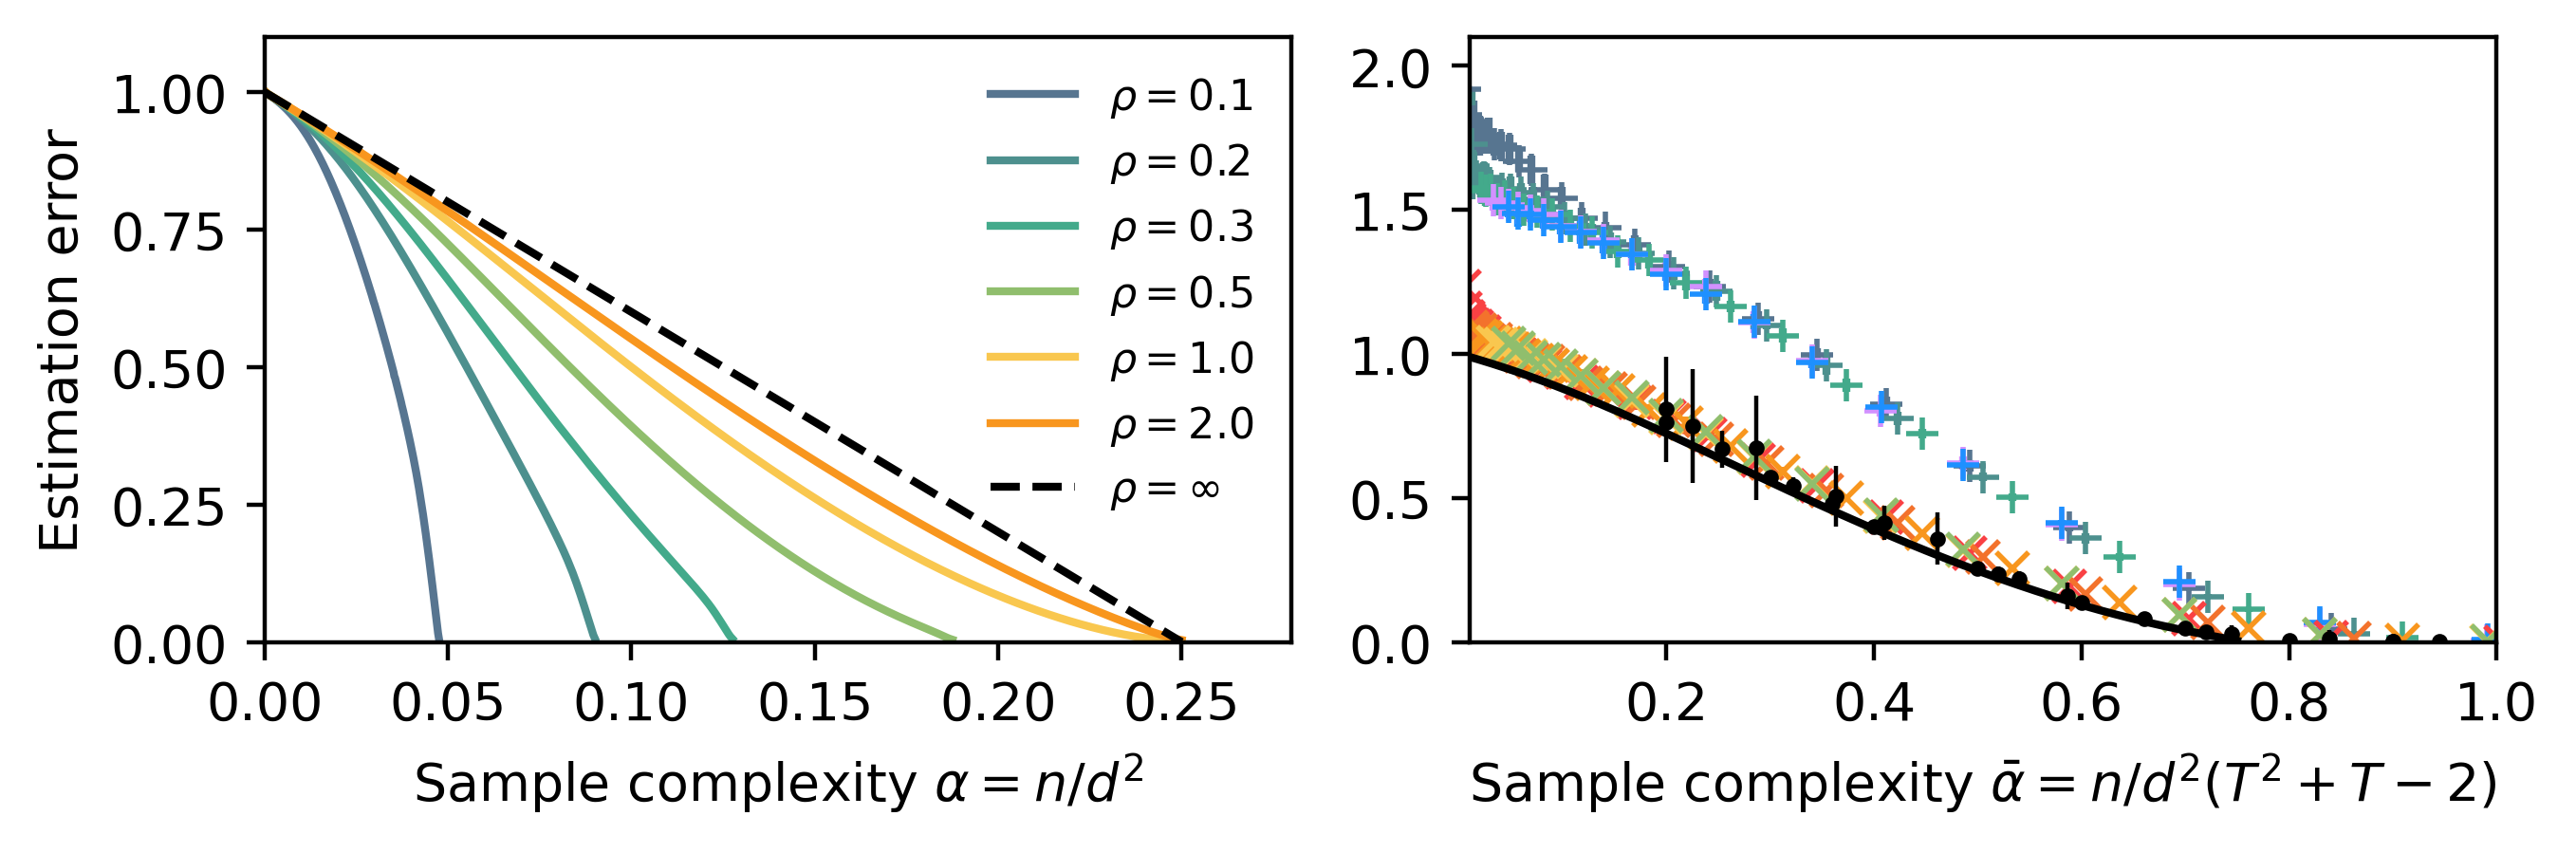

In [3]:
colors = {
    0.1: "#577590",  # Tomato red
    0.2: "#4d908e",  # Orange
    0.3: "#43aa8b",  # Gold
    0.5: "#90be6d",  # Lime green
    1.0: "#f9c74f",  # Dodger blue
    2.0: "#f8961e",  # Blue-violet
    0: "black"       # Black for reference
}


softmax_colors = {
    0.1: "#577590",  # Dark pastel blue
    0.2: "#4d908e",  # Teal
    0.3: "#43aa8b",  # Green
    0.5: "#90be6d",  # Lime green
    1.0: "#f9c74f",  # Yellow
    2.0: "#f8961e",  # Orange
    0: "black"       # Black for reference
}

gd_colors = {
    2: "#577590",  # Dark pastel blue
    3: "#4d908e",  # Teal
    4: "#43aa8b",  # Green
    5: "#d291ff",  # Lime green
    6: "#1e90ff",  # Yellow
    0: "black"     # Black for reference
}

agd_colors = {
    2: "#f94144",  # Vibrant red
    3: "#f3722c",  # Vibrant orange
    4: "#f8961e",  # Vibrant yellow-orange
    5: "#f9c74f",  # Vibrant yellow
    6: "#90be6d",  # Lime green
    0: "black"     # Black for reference
}

fig, ax = plt.subplots(1, 2, figsize=(6.8, 2.35), dpi=400)
plt.subplot(121)

rho_list = [0.1, 0.2, 0.3, 0.5, 1.0, 2.0]
for rho in rho_list:
    df = pd.read_csv(f"data/SE_softmax/SE_softmax_T={2}_rho={rho}.csv")
    plt.plot(df['alpha'], df['mmse'], '', label=rf'$\rho = {rho}$', color=softmax_colors[rho])

plt.plot([0, 1/4], [1, 0], '--', color='black', label=r'$\rho = \infty$')
plt.legend(frameon=False, loc='upper right', fontsize=8)#, bbox_to_anchor=(0.68, 1.05))
plt.ylim(0, 1.1)
plt.xlim(0, 0.28)

plt.xlabel(r'Sample complexity $\alpha = n/d^2 $')
plt.ylabel('Estimation error')

plt.subplot(122)



for T, marker, linestyle in zip([2, 3, 4, 5, 6], ['+']*5, ['']*5):
    df = pd.read_csv(f"data/GD_single/GD_softmax_D=200_rho=0.5_T={T}.csv")
    plt.errorbar(df['alpha']*(T**2+T-2), df['mmse'], df['mmse_std'], marker=marker, linestyle=linestyle, color=gd_colors[T], label=f"T = {T}")


for T, marker, linestyle in zip([2, 3, 4, 5, 6], ['x']*5, ['']*5):
    df = pd.read_csv(f"data/GD_averaged/GD_softmax_D=200_rho=0.5_T={T}_averages=32.csv")
    plt.errorbar(df['alpha']*(T**2+T-2), df['mmse'], df['mmse_std'], marker=marker, linestyle=linestyle, color=agd_colors[T], label=f"T = {T}")


df = pd.read_csv(f"data/SE_softmax/SE_softmax_T={2}_rho={0.5}.csv")
plt.plot(df['alpha']*4, df['mmse'], '', color="black", zorder =10)

for T in [2, 3, 4]:
    df = pd.read_csv(f"data/AMP_softmax/AMP_softmax_T={T}_rho={0.5}.csv")
    plt.errorbar(df['alpha']*(T**2+T-2), df['mmse'], yerr=df['mmse_std'], fmt='o', ms=2, linewidth=0.8, zorder =10, color="black")


plt.xlabel(r'Sample complexity $\bar\alpha = n/d^2(T^2 + T - 2)$')

plt.xlim(1e-2, 1.)
plt.ylim(0.0, 2.1)

plt.tight_layout()
